# Data Loading

Reading the data from the file

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('DSL-StrongPasswordData.csv')
print(data.head(5))
data_visualization = data

  subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t     H.t  \
0    s002             1    1    0.1491       0.3979       0.2488  0.1069   
1    s002             1    2    0.1111       0.3451       0.2340  0.0694   
2    s002             1    3    0.1328       0.2072       0.0744  0.0731   
3    s002             1    4    0.1291       0.2515       0.1224  0.1059   
4    s002             1    5    0.1249       0.2317       0.1068  0.0895   

   DD.t.i  UD.t.i     H.i  ...     H.a  DD.a.n  UD.a.n     H.n  DD.n.l  \
0  0.1674  0.0605  0.1169  ...  0.1349  0.1484  0.0135  0.0932  0.3515   
1  0.1283  0.0589  0.0908  ...  0.1412  0.2558  0.1146  0.1146  0.2642   
2  0.1291  0.0560  0.0821  ...  0.1621  0.2332  0.0711  0.1172  0.2705   
3  0.2495  0.1436  0.1040  ...  0.1457  0.1629  0.0172  0.0866  0.2341   
4  0.1676  0.0781  0.0903  ...  0.1312  0.1582  0.0270  0.0884  0.2517   

   UD.n.l     H.l  DD.l.Return  UD.l.Return  H.Return  
0  0.2583  0.1338       0.3509       0.217

# Data Visualization
## Correlation Matrix

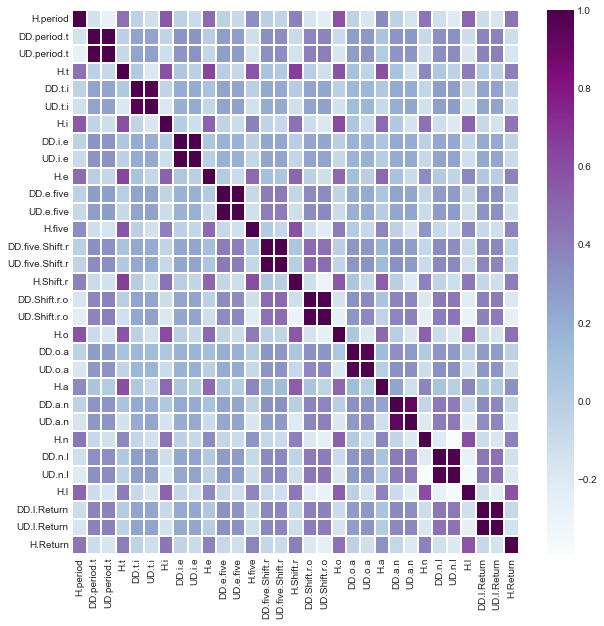

In [4]:
import seaborn as sn # statistical graphs
import matplotlib.pyplot as plt # data graphs
plt.style.use('seaborn-dark')
data_visualization.iloc[:,:-1]

corrMatrix = data_visualization[['H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return']].corr()
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(corrMatrix, linewidths=0.1, cmap="BuPu")
plt.show()

From the figure above we can notice the correlation of the features with each other. We can observe that for each digraph the key-up and down time (UD, DD) are strongly correlated. We can also observe that the key holdtime for the monographs are also correlated but not as strong as the digraphs.

#### Separate Monographs and Digraphs

In [22]:
h_cols=['subject'] # only the hold time (monograph)
ud_cols=['subject'] # only key-up and down (digraph)
dd_cols=['subject'] # only key-down down (digraph)
ud_dd_cols= ['subject'] # both UD and DD

h_cols.append('sessionIndex')
ud_cols.append('sessionIndex')
dd_cols.append('sessionIndex')
ud_dd_cols.append('sessionIndex')

h_cols.append('rep')
ud_cols.append('rep')
dd_cols.append('rep')
ud_dd_cols.append('rep')

for column in data_visualization.columns:
    if 'H' in column:
        h_cols.append(str(column))
    if 'UD' in column:
        ud_cols.append(str(column))
        ud_dd_cols.append(str(column))
    if 'DD' in column:
        dd_cols.append(str(column))
        ud_dd_cols.append(str(column))
print(dd_cols)
print(h_cols)
print(ud_cols)
print(ud_dd_cols)


['subject', 'sessionIndex', 'rep', 'DD.period.t', 'DD.t.i', 'DD.i.e', 'DD.e.five', 'DD.five.Shift.r', 'DD.Shift.r.o', 'DD.o.a', 'DD.a.n', 'DD.n.l', 'DD.l.Return']
['subject', 'sessionIndex', 'rep', 'H.period', 'H.t', 'H.i', 'H.e', 'H.five', 'H.Shift.r', 'H.o', 'H.a', 'H.n', 'H.l', 'H.Return']
['subject', 'sessionIndex', 'rep', 'UD.period.t', 'UD.t.i', 'UD.i.e', 'UD.e.five', 'UD.five.Shift.r', 'UD.Shift.r.o', 'UD.o.a', 'UD.a.n', 'UD.n.l', 'UD.l.Return']
['subject', 'sessionIndex', 'rep', 'DD.period.t', 'UD.period.t', 'DD.t.i', 'UD.t.i', 'DD.i.e', 'UD.i.e', 'DD.e.five', 'UD.e.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'DD.o.a', 'UD.o.a', 'DD.a.n', 'UD.a.n', 'DD.n.l', 'UD.n.l', 'DD.l.Return', 'UD.l.Return']


## DD(Key down-down) Plots


['subject', 'sessionIndex', 'rep', 'DD.period.t', 'DD.t.i', 'DD.i.e', 'DD.e.five', 'DD.five.Shift.r', 'DD.Shift.r.o', 'DD.o.a', 'DD.a.n', 'DD.n.l', 'DD.l.Return']


<AxesSubplot:title={'center':"Digraph period.t's key downtime over session 1"}, xlabel='rep'>

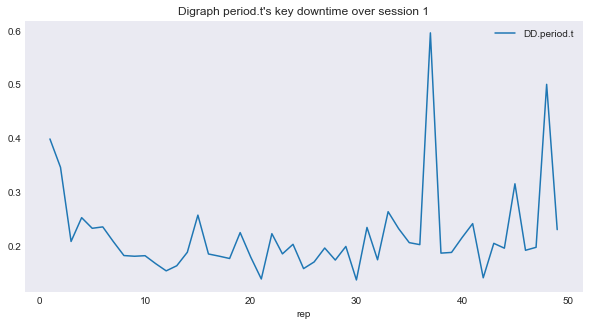

In [55]:
print(dd_cols)
kdd_latency_002 = data_visualization[dd_cols]
kdls_002 = kdd_latency_002['subject']
kdd_latency_002 = kdd_latency_002.where((kdls_002 =='s002') & (kdd_latency_002['sessionIndex']==1)& (kdd_latency_002['rep']<50))
kdd_latency_002.dropna()
kdd_latency_002.plot(x='rep', y='DD.period.t', figsize=(10,5), title="Digraph period.t's key downtime over session 1")


The above figure shows digraph `.t`'s key down time over session 1. As we know that each session has 50 repetations. Normally over the time an user should take less time to type a password. And we can notice that trend from beginning till around 36th repetation.  After 35th repetation we can notice 3 peeks which means instead of taking less time, in those cases user took more time. One possible reason is that user might typed the password mistakenly.

<AxesSubplot:title={'center':"Digraph period.t and t.i's key downtime over session 1"}, xlabel='rep'>

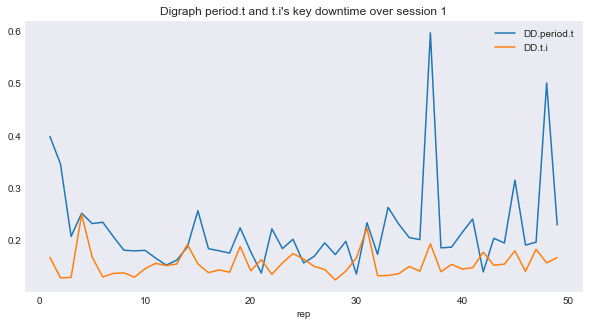

In [31]:
kdd_latency_002.plot(x='rep', y=['DD.period.t', 'DD.t.i'], figsize=(10,5), title="Digraph period.t and t.i's key downtime over session 1")

The above figure shows digraph `.t` and `ti`'s key down time over session 1. We can notice that the digraph `ti` took comperatively less key down time than `.t`.We can also see similiar trend in those two cases. Whenever `.t` took longer time `ti` also took the same. 

### DD plot of user 's002' for session 1

['subject', 'sessionIndex', 'rep', 'DD.period.t', 'DD.t.i', 'DD.i.e', 'DD.e.five', 'DD.five.Shift.r', 'DD.Shift.r.o', 'DD.o.a', 'DD.a.n', 'DD.n.l', 'DD.l.Return']


<AxesSubplot:xlabel='rep'>

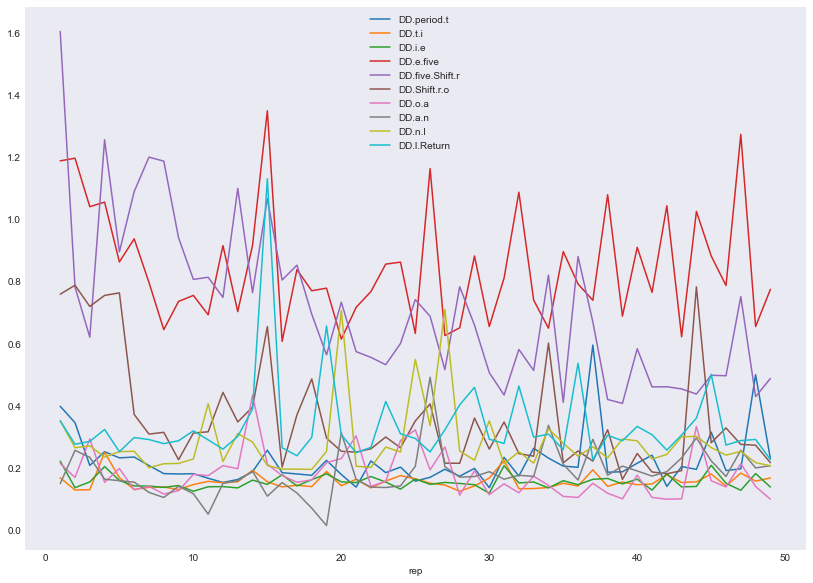

In [53]:
print(dd_cols)
kdd_latency_002 = data_visualization[dd_cols]

kdls_002 = kdd_latency_002['subject']
kdd_latency_002 = kdd_latency_002.where((kdls_002 =='s002') & (kdd_latency_002['sessionIndex']==1)& (kdd_latency_002['rep']<50))
kdd_latency_002.drop(columns=['sessionIndex'],axis=1,inplace=True)
kdd_latency_002.dropna()
kdd_latency_002 = kdd_latency_002.groupby('rep').agg('mean')
#kdd_latency_002.T.plot(figsize=(15,10))
kdd_latency_002.plot(figsize=(14, 10))

The above figure shows key-down time changes for session 1 for each repetition. It is noticeable that the digraph `DD.t.i` and `DD.a.n` takes comparatively less time whereas `DD.e.five` and `DD.five.Shift.r` takes most time. It is understandable since the key `5` is in the furthest right of the keyboard and  in `DD.five.Shift.r` there is a need of pressing extra `shift` hence the total time increases. Also if we pay close attention to the peaks in the figure, we can realize that the top peaks are actually from the first few repetitions. However, we also notice some peeks in later part, possible those are the cases where user typed the passwed mistakenly.

<AxesSubplot:title={'center':'key downtime for each digraphs over multiple sessions'}>

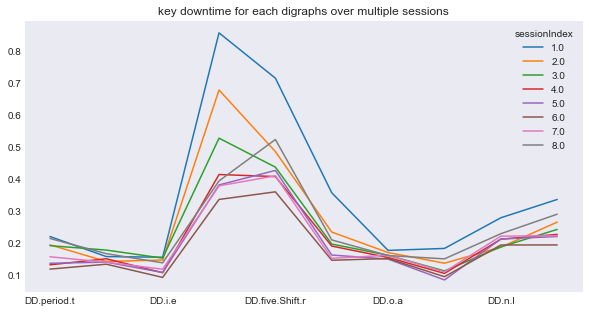

In [54]:
kdd_latency_002 = data_visualization[dd_cols]
kdd_latency_002 = kdd_latency_002.drop(columns=['rep'], axis=1)
kdls_002 = kdd_latency_002['subject']
kdd_latency_002 = kdd_latency_002.where((kdls_002 =='s002'))
kdd_latency_002 = kdd_latency_002.groupby('sessionIndex').agg('mean')
kdd_latency_002.T.plot(figsize=(10,5), title="key downtime for each digraphs over multiple sessions")

The above figure shows average key-down time for digraphs for multiple sessions. We can easily notice that this figure also shows results to the previous one. Diagraph `DD.e.five` and `DD.five.Shift.r` indeed took the most key down time even for multiple sessions. Also if we sum up the average key down time we can observe that session 5,6, and 7 took less time. Most probably by this time user got used to typing the password. However, session 8 took comparatively more time. One possible reason could be the time difference of the session recording. In other words, there was a significant time difference between recording session 7 and 8.

## H(Hold time) Plots

### 'H.period' monograph of user 's002' for session 1 

['subject', 'sessionIndex', 'rep', 'H.period', 'H.t', 'H.i', 'H.e', 'H.five', 'H.Shift.r', 'H.o', 'H.a', 'H.n', 'H.l', 'H.Return']


<AxesSubplot:title={'center':"Digraph period.t's key downtime over session 1"}, xlabel='rep'>

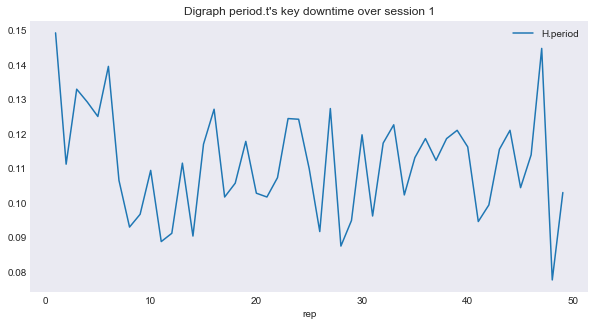

In [66]:
kh_latency_002 = data_visualization[h_cols]
kdls_002 = kh_latency_002['subject']
kh_latency_002 = kh_latency_002.where((kdls_002 =='s002') & (kh_latency_002['sessionIndex']==1)& (kh_latency_002['rep']<50))
kh_latency_002.drop(columns=['sessionIndex'],axis=1,inplace=True)
kh_latency_002.dropna()
kh_latency_002.plot(x='rep', y=['H.period'], figsize=(10,5), title="Hold time H.period's key downtime over session 1")


### 'H.period' and 'H.t' monograph's key hold time of user 's002' for session 1

<AxesSubplot:title={'center':"Hold time H.period's key downtime over session 1"}, xlabel='rep'>

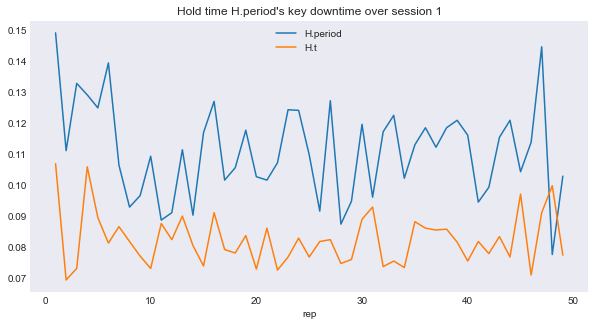

In [67]:
kh_latency_002 = data_visualization[h_cols]
kdls_002 = kh_latency_002['subject']
kh_latency_002 = kh_latency_002.where((kdls_002 =='s002') & (kh_latency_002['sessionIndex']==1)& (kh_latency_002['rep']<50))
kh_latency_002.drop(columns=['sessionIndex'],axis=1,inplace=True)
kh_latency_002.dropna()
kh_latency_002.plot(x='rep', y=['H.period', 'H.t'], figsize=(10,5), title="Hold time H.period's key downtime over session 1")


### H plot of user 's002' for session 1 

['subject', 'sessionIndex', 'rep', 'H.period', 'H.t', 'H.i', 'H.e', 'H.five', 'H.Shift.r', 'H.o', 'H.a', 'H.n', 'H.l', 'H.Return']


<AxesSubplot:title={'center':"Digraph period.t's key downtime over session 1"}, xlabel='rep'>

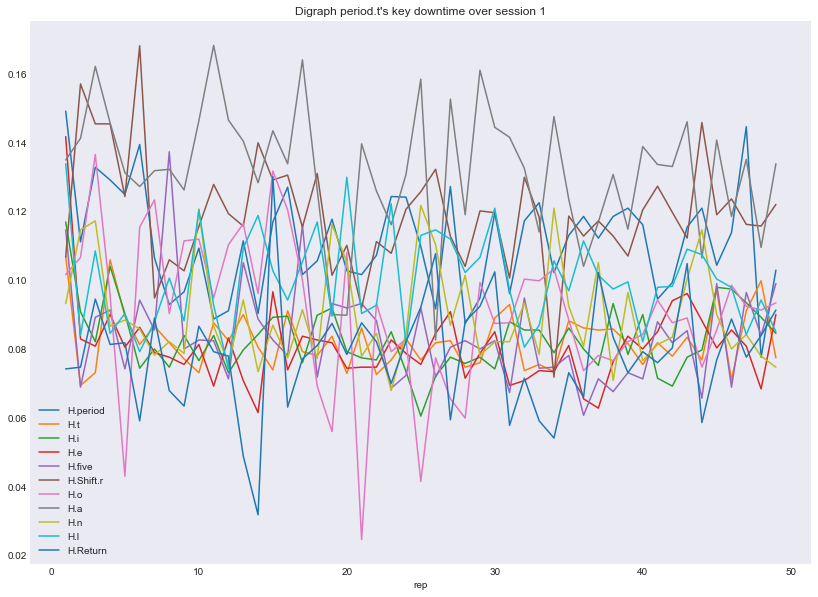

In [65]:
print(h_cols)
kh_latency_002 = data_visualization[h_cols]
kdls_002 = kh_latency_002['subject']
kh_latency_002 = kh_latency_002.where((kdls_002 =='s002') & (kh_latency_002['sessionIndex']==1)& (kh_latency_002['rep']<50))
kh_latency_002.drop(columns=['sessionIndex'],axis=1,inplace=True)
kh_latency_002.dropna()
kh_latency_002.plot(x='rep', y=['H.period', 'H.t', 'H.i', 'H.e', 'H.five', 'H.Shift.r', 'H.o', 'H.a', 'H.n', 'H.l', 'H.Return'], figsize=(14,10), title="Digraph period.t's key downtime over session 1")


### H plot of user 's002' for  all sessions

<AxesSubplot:>

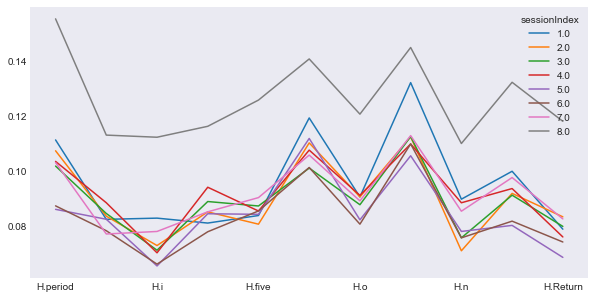

In [9]:
key_hold_latency_002 = data_visualization[h_cols]
key_hold_latency_002=key_hold_latency_002.drop(columns=['rep'], axis=1)
khls_002 = key_hold_latency_002['subject']
key_hold_latency_002 = key_hold_latency_002.where((khls_002 =='s002'))
key_hold_latency_002 = key_hold_latency_002.groupby('sessionIndex').agg('mean')
key_hold_latency_002.T.plot(figsize=(10,5))

In the above figure we can see the average hold time for user 's002' across the sessions. We do notice a trend where 'H.i' took least and 'H.a' took the most time in comparison to other monographs. All the session shows same trend except for session 8. This happened may be because this particular session were recorded few days later(since we know each session had gap of at least 1 day).

### H plot of multiple users for session 1

Index(['subject', 'sessionIndex', 'rep', 'H.period', 'H.t', 'H.i', 'H.e',
       'H.five', 'H.Shift.r', 'H.o', 'H.a', 'H.n', 'H.l', 'H.Return'],
      dtype='object')


<AxesSubplot:>

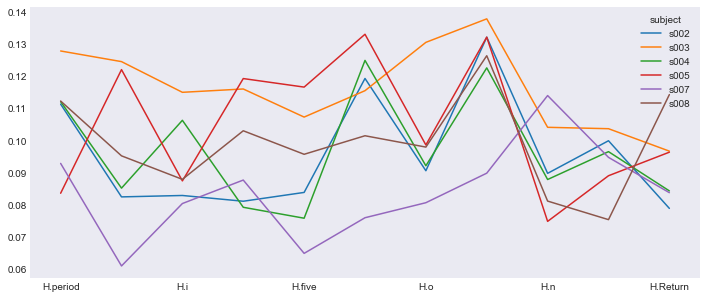

In [75]:
kh_latency = data_visualization[h_cols]
print(kh_latency.columns)
kh_latency = kh_latency.drop(columns=['rep'], axis=1)
khls = kh_latency['subject']
kh_latency = kh_latency.where(khls.isin(['s002', 's003','s004','s005','s007','s008']) & (kh_latency['sessionIndex']==1))
kh_latency = kh_latency.groupby('subject').agg('mean')
kh_latency.drop(columns=['sessionIndex'],axis=1,inplace=True)
kh_latency.T.plot(figsize=(12,5))

### H plot of multiple users for all session

Index(['subject', 'sessionIndex', 'rep', 'H.period', 'H.t', 'H.i', 'H.e',
       'H.five', 'H.Shift.r', 'H.o', 'H.a', 'H.n', 'H.l', 'H.Return'],
      dtype='object')


<AxesSubplot:>

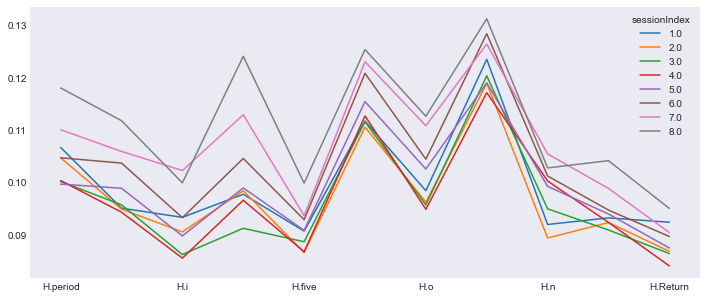

In [76]:
kh_latency = data_visualization[h_cols]
print(kh_latency.columns)
kh_latency = kh_latency.drop(columns=['rep'], axis=1)
khls = kh_latency['subject']
kh_latency = kh_latency.where(khls.isin(['s002', 's003','s004','s005','s007','s008']))
kh_latency = kh_latency.groupby('sessionIndex').agg('mean')
kh_latency.T.plot(figsize=(12,5))

If we observe the hold time for the monographs across different users, it's noticeable that user 's003' took longer time than others.

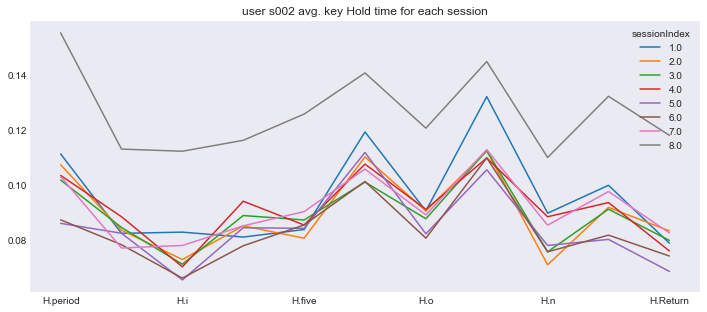

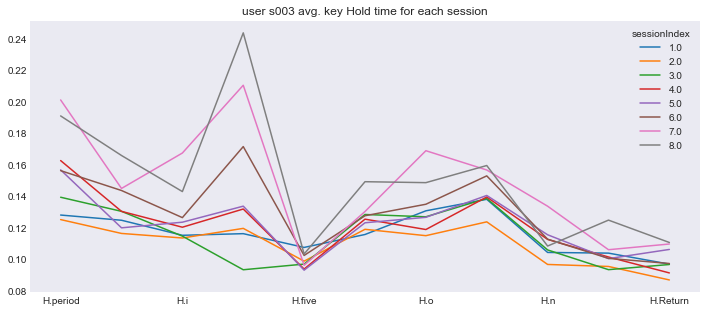

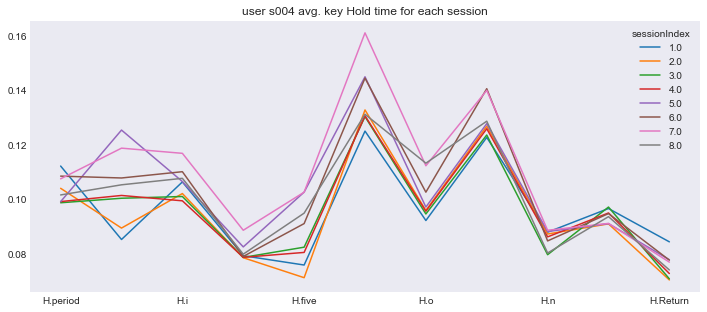

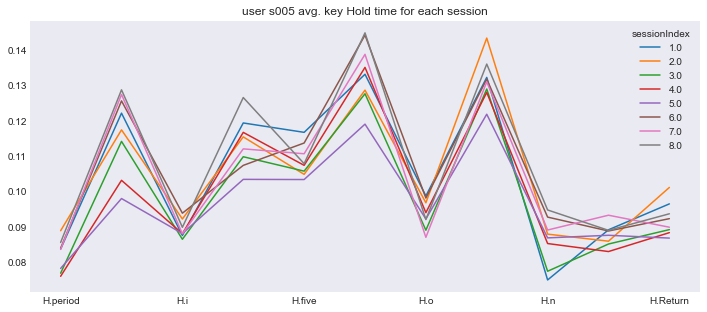

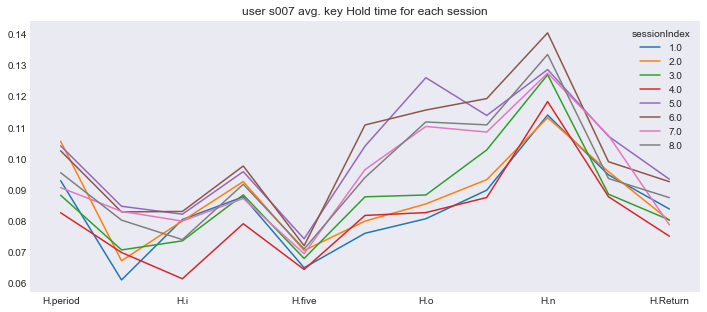

In [77]:
count = 1
for i in data_visualization['subject'].unique():
    kh_latency_i = data_visualization[h_cols]
    kh_latency_i = kh_latency_i.drop(columns=['rep'], axis=1)
    khls_i = kh_latency_i['subject']
    kh_latency_i = kh_latency_i.where(khls_i.isin([i]))
    kh_latency_i = kh_latency_i.groupby('sessionIndex').agg('mean')
    kh_latency_i.T.plot(figsize=(12,5), title= 'user '+str(i)+' avg. key Hold time for each session')
    
    
    if count==5:
        break
    else:
        count+=1


## Data Pre-processing

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

data = pd.read_csv('DSL-StrongPasswordData.csv')
data.drop(columns=['sessionIndex','rep'],axis=1,inplace=True)
user = data['subject']
data = data.where(user.isin(['s002', 's003','s004','s005','s007','s008']))
data = data.dropna()


# One Hot encoding the subject column. seperating the label from the rest of columns
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
unique_cols = data['subject'].nunique()

data = np.array(ct.fit_transform(data))
X = data[:,unique_cols:]
y = data[:,:unique_cols]


# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 10)


# applying feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train Models

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

model = KNeighborsClassifier(n_neighbors=5)
#model = DecisionTreeClassifier()
#model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=1)

model.fit(X_train, y_train)
print(f"Classifier description\n{str(model).split('(')[0]}")
print("Testing the classifier")
y_pred = model.predict(X_test)

Classifier description
KNeighborsClassifier
Testing the classifier


### Classification Results

In [15]:
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy 0.9152777777777777
720 720
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       145
           1       0.94      0.90      0.92       108
           2       0.94      0.90      0.92       132
           3       0.96      0.98      0.97        94
           4       0.98      0.92      0.95       120
           5       0.97      0.92      0.94       121

   micro avg       0.95      0.92      0.93       720
   macro avg       0.95      0.92      0.93       720
weighted avg       0.95      0.92      0.93       720
 samples avg       0.92      0.92      0.92       720



/Users/pritomkm/PycharmProjects/pythontest/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Saving the mode for prediction

In [16]:
import pickle

print("Saving the model")
filename = str(model).split('()')[0]+"_model.sav"
pickle.dump(model, open(filename,'wb'))
print("Saved the model")

Saving the model
Saved the model


From the above results we can see our `KNN` model can get more than 91.5% accuracy for classifing 6 users keystroke pattern.
